In [1]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function

# Matplotlib
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. allow for interactive, cross-platform control of figures and plots
 2. make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

All copy-rights to Mani Bayani, Ph.D.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains the [example galleries](https://matplotlib.org/gallery/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and [tutorials](https://matplotlib.org/tutorials/index.html).

## Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](https://matplotlib.org/gallery/index.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, if you have a new and interesting plot that demonstrates a feature of Matplotlib, feel free to submit a concise, well-commented version of the code for inclusion in the gallery.



# On with the show!
Matplotlib is a large project and can seem daunting at first. However, by learning the components, it should begin to feel much smaller and more approachable.

## Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):


The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it is worth mentioning here to explain where the term ``Axes`` comes from.


## Getting Started

In this tutorial, we'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include, in some versions:
%matplotlib inline

### Figures

Now let's create a figure...

In [3]:
# the blank space?
fig = plt.figure(facecolor=(1, 0, 0, .1))   # red background to see where the figure is

<Figure size 640x480 with 0 Axes>

Awww, nothing happened! This is because by default mpl will not show anything until told to do so.

Instead, we'll need to call ``plt.show()``

In [4]:
plt.show()

Great, a blank figure! Not terribly useful yet.


However, while we're on the topic, you can control the size of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

A really useful utility function is [`figaspect`](https://matplotlib.org/api/_as_gen/matplotlib.figure.figaspect.html?highlight=figaspect#matplotlib.figure.figaspect)

In [5]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0), facecolor=(1, 0, 0, .1))
plt.show()

<Figure size 400x800 with 0 Axes>

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

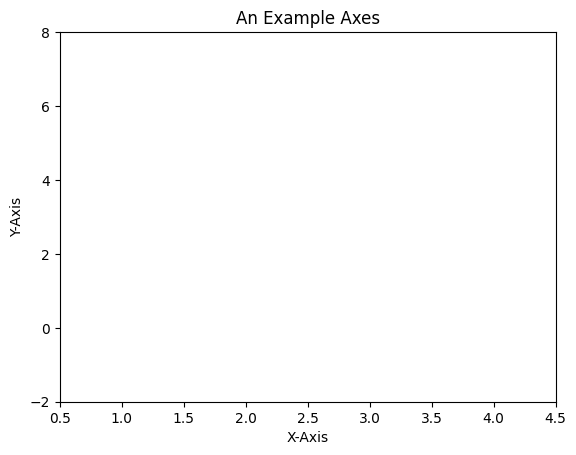

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111) #Basically, 1plot in 1 row and 1 column. 뒤에 interchangeable 한거 나오네 반대 인듯, 1*1 grid에 1 subplot
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

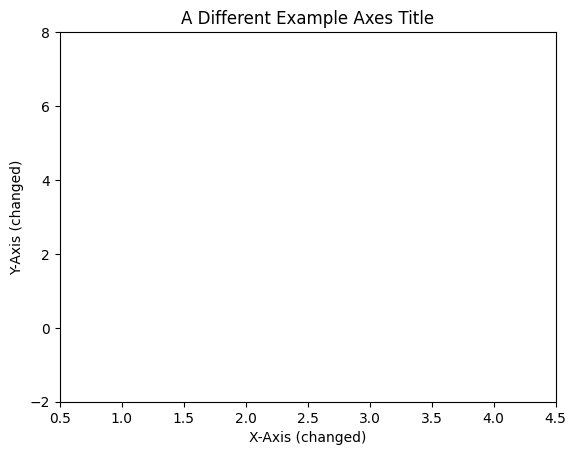

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')
plt.show()

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

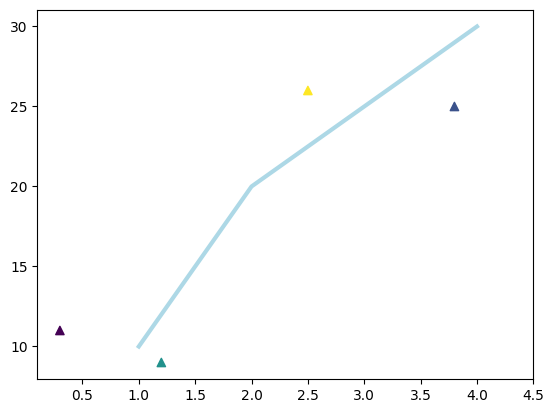

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3) # line plot
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')#marker o 는 동그라미 나오네
ax.set_xlim(0.1, 4.5)
plt.show()

## Axes methods vs. pyplot (두번째 방법, 조교님 많이 하심, weaker?)

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

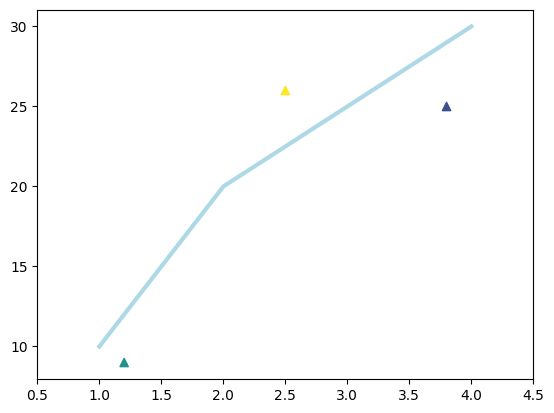

In [9]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)
plt.show()

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

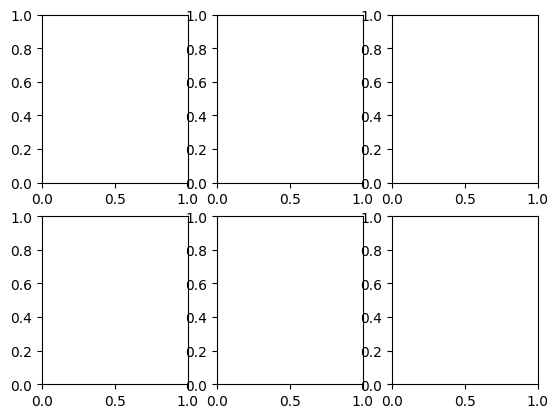

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3)
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

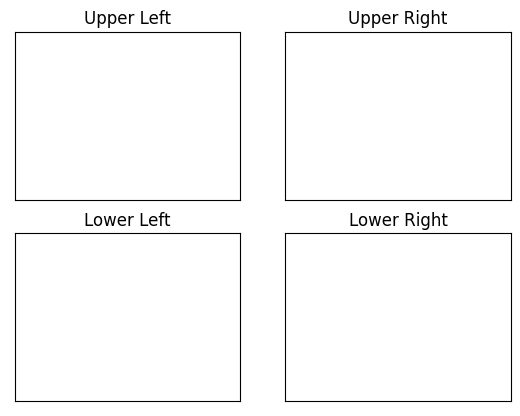

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)# 우잉
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

### contour plot

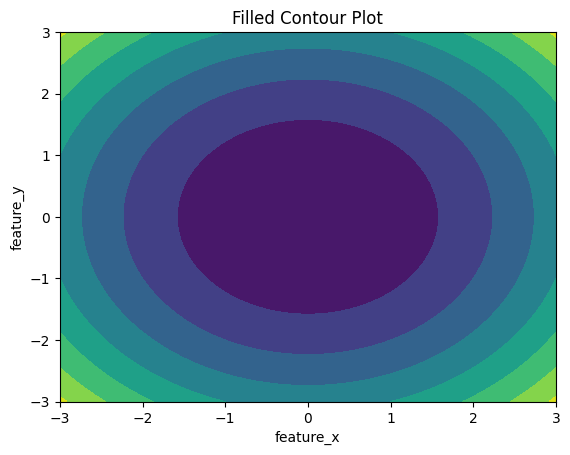

In [12]:
feature_x = np.linspace(-3.0, 3.0, 100) 
feature_y = np.linspace(-3.0, 3.0, 100) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) #cartesian product
X,Y
  
fig, ax = plt.subplots(1, 1) 
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot 
ax.contourf(X, Y, Z) 
  
ax.set_title('Filled Contour Plot') 
ax.set_xlabel('feature_x') 
ax.set_ylabel('feature_y') 
plt.show() 

#what value of Z it is plotting?

### Multiple lines

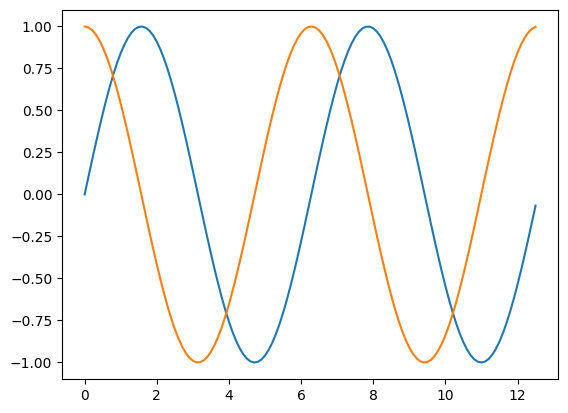

In [13]:
x = np.arange(0,4*np.pi,0.1)
y = np.sin(x)
z = np.cos(x)
fig,ax = plt.subplots() # bigin your plot
ax.plot(x,y)
ax.plot(x,z)
plt.show() # this ends

# Sklearn

In [14]:
import sklearn

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [15]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [16]:
model = LinearRegression()
print(model.normalize)

deprecated


In [17]:
print(model) #copy_x true x copy 하지 마라?

LinearRegression()


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [18]:
x = np.arange(10)
y = 2 * x + 1

In [19]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


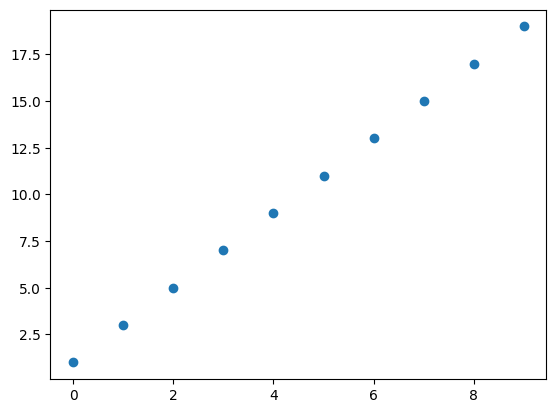

In [20]:
plt.plot(x, y, 'o');

In [21]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]#add one dimension 아 matrix 처럼 만드네 근데 2 dimension? linear algebra 랑 다른가보네
print(X)
print(y)
print(x.shape)
print(X.shape)
print(y.shape)

print(Y.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]
(10,)
(10, 1)
(10,)
(100, 100)


In [22]:
# fit the model on our data
model.fit(X, y) #X and Y are data will give error need 2 dimensional why? if X is not 2 dimensional need to do In 28

LinearRegression()

In [23]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
1.0


The model found a line with a slope 2 and intercept 1, as we'd expect.

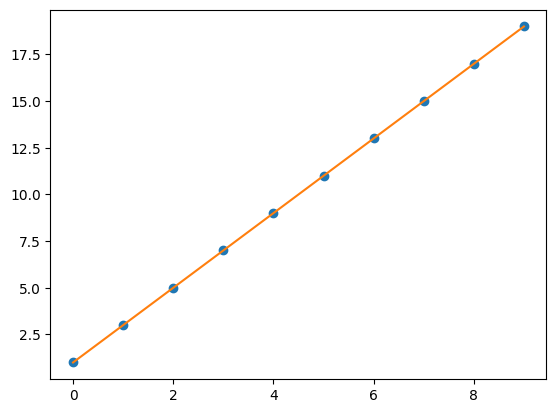

In [24]:
plt.plot(x, y, 'o')
plt.plot(X, model.intercept_+model.coef_*X, label='Linear regression (Scikit-learn GLM)')
plt.show()
#needed for HW

In [25]:
model.predict([[2]]) #should be in matrix form, 2 dimension

array([5.])